In [1]:
# Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Truncamiento de Distribuciones

#### Autor: Jerónimo Sánchez Cardozo

Cuando hablamos del truncamiento de distribuciones nos referimos a limitar el rango de una distribución de probabilidad, esto modifica las propiedades originales de la distribución y afecta su forma y sus parametros fundamentales.  
El truncamiento de distribuciones consiste en restringir una distribución a un intervalo específico [a,b], excluyendo los valores de la distribución que se encuentren fuera de estos limites, permitiendo adaptar modelos teoricos a restricciones practicas del mundo real y mejorar la precisión analítica de los modelos.  
Hay diversos metodos para realizar el truncamiento de distribuciones, pero este notebook hablaremos de tres de ellos, el truncamiento por valores absolutos, donde se establece un intervalo concreto, truncamiento por desviaciones estandar, que mantiene la proporcionalidad con la dispersión original de los datos, y el truncamiento por desviaciones estandar, que elimina un porcentaje de datos.

### Truncamiento por Valores Absolutos

El truncamiento por valores absolutos es una técnica estadística, esta establece unos limites numericos concretos, eliminando los valores que no se encuentren dentro de estos limites.  
Este truncamiento es muy util cuando hay restriciones absolutas de los datos y modelar fenómenos que en la realidad tienen restricciones físicas, contracturales y o técnicas, por ejemplo un precio minimo y uno maximo debido a leyes.  
Un truncamiento de este tipo tiene ciertos efectos, como la redistribución de la densidad de probabilidad dentro del intervalo y tener que recalcular la media y la varianza porque las originales pierden validez.  
Este es muy utilizado en campos como las finanzas, para acotar precios debido a limites regulatorios, control de calidad, debido a especificaciones tecnicas de componentes industriales, y en las ciencias sociales, para el analisis de encuentas con escalas acotadas.

##### -Distribución continua

Para realizar el truncamiento por valores absolutos utilizaremos la función, de la libreria de numpy, clip que elimina los valores fuera de los limites y los reemplaza por los valores limites

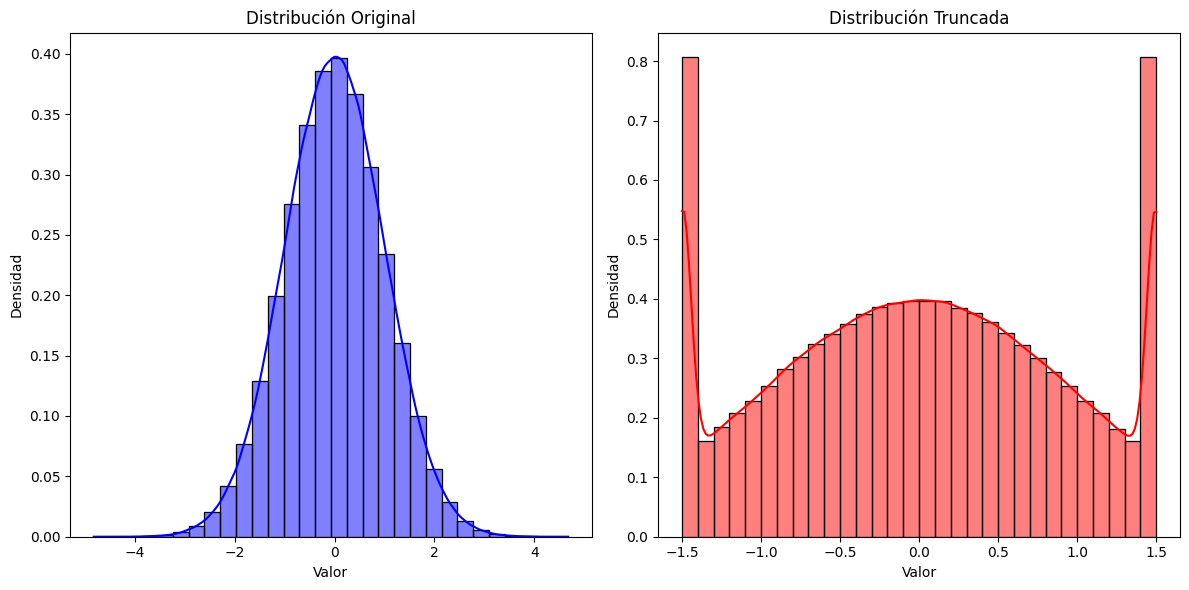

In [3]:
# Función de truncamiento por valores absolutos
def truncate_distribution(dist, limiteInferior, limiteSuperior):
    truncated_dist = np.clip(dist, limiteInferior, limiteSuperior)
    return truncated_dist

# Se genera una muestra de datos con una distribución normal (se puede cambiar a otra distribución)
np.random.seed(42)
mu, sigma = 0, 1  # Media y desviación estándar
tamaño = 1000000
datos = np.random.normal(mu, sigma, tamaño)

# Definimos los límites del truncamiento
Inferior_limit = -1.5
Superior_limit = 1.5

# Aplicamos el truncamiento
datos_truncados = truncate_distribution(datos, Inferior_limit, Superior_limit)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos, kde=True, color="blue", stat="density", bins=30)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=True, color="red", stat="density", bins=30)
plt.title("Distribución Truncada")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

##### -Distribución discreta

Para realizar el truncamiento por valores absolutos utilizaremos la función, de la libreria de numpy, clip que elimina los valores fuera de los limites y los reemplaza por los valores limites

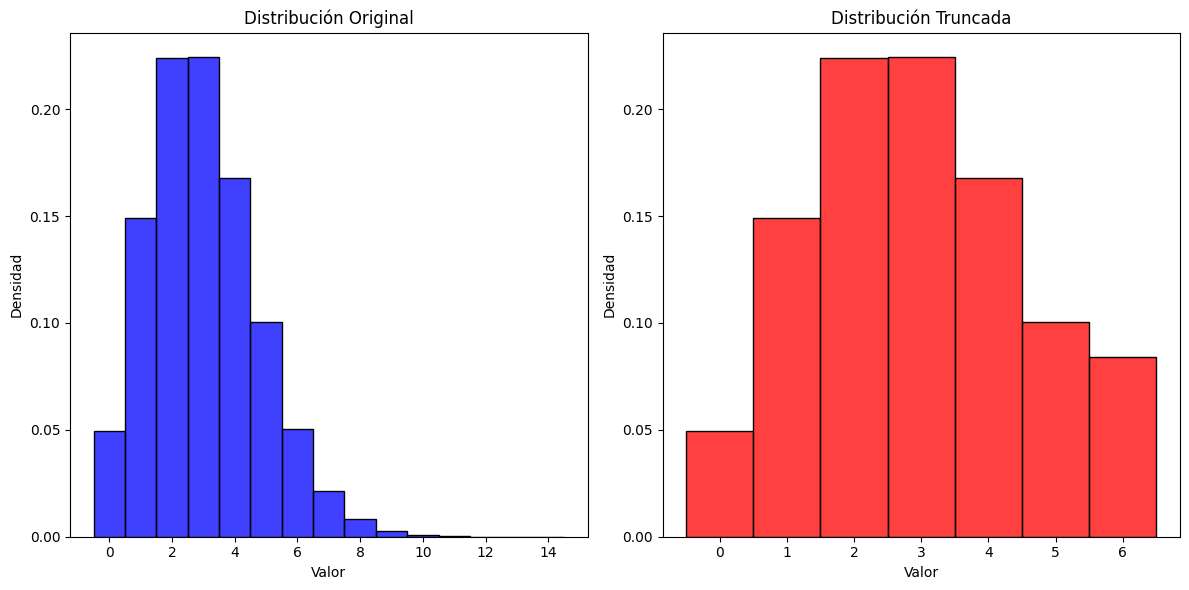

In [9]:
# Función de truncamiento por valores absolutos
def truncate_distribution(dist, limiteInferior, limiteSuperior):
    truncated_dist = np.clip(dist, limiteInferior, limiteSuperior)
    return truncated_dist

# Se genera una muestra de datos con una distribución Poisson (se puede cambiar a otra distribución)
np.random.seed(42)
lambda_poisson = 3  # Parámetro de la distribución Poisson
tamaño = 1000000
datos = np.random.poisson(lambda_poisson, tamaño)

# Definimos los límites del truncamiento
Inferior_limit = 0
Superior_limit = 6

# Aplicamos el truncamiento
datos_truncados = truncate_distribution(datos, Inferior_limit, Superior_limit)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos, kde=False, color="blue", stat="density", bins=np.arange(min(datos), max(datos) + 1, 1), discrete=True)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=False, color="red", stat="density", bins=np.arange(min(datos_truncados), max(datos_truncados) + 1, 1), discrete=True)
plt.title("Distribución Truncada")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

### Truncamiento por desviaciones estandar

El truncamiento por desviaciones estandar consiste en establecer los limites de una distribución mediante los multiplos de la desviación estandar, este establece los limites de la distribución segun la desviación estandar alrededor de la media.  
La formula para calcular los limites es muy sencilla:  
$ Limite = Media +- k*DesviaciónEstandar   (k E R^+) $  
En este se mantiene la proporcionalidad con respecto a la original.  
Es muy utilizado en el analisis de eficiencia tecnica, en finanzas para el modelado de riesgos financieros, para evitar perdidas exxtremas, y en la investigación científica, en la eliminación de outliers.

##### -Distribución Continua

Utilizaremos la misma función clip de numpy para realizar el truncamiento pero calculamos los limites del truncamiento en base a la formula mencionada en la explicación de arriba.

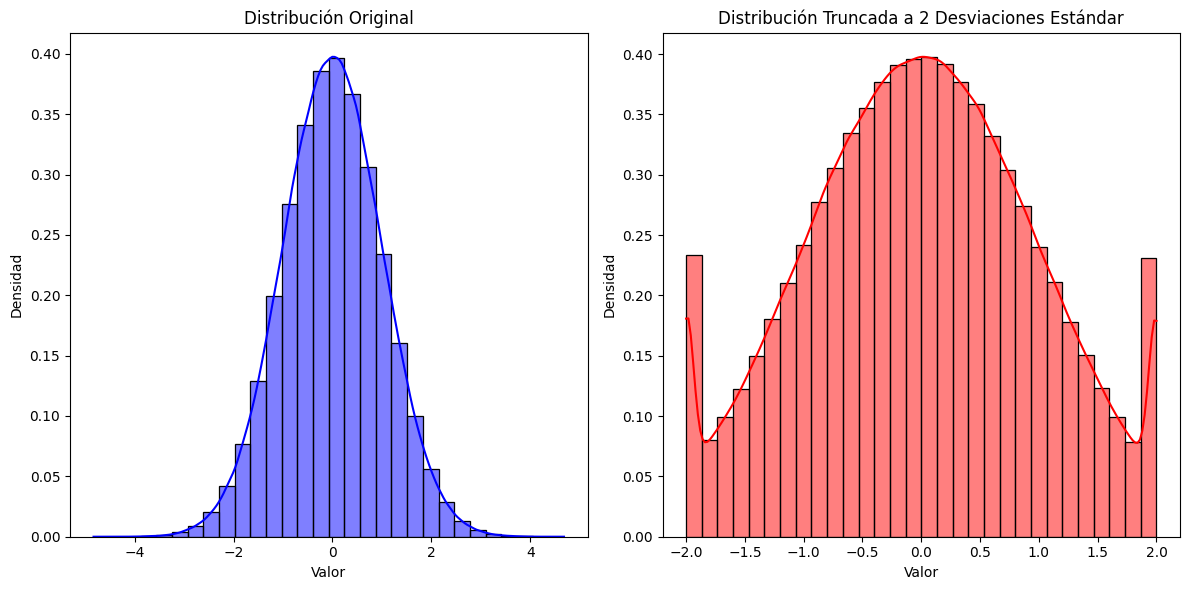

In [6]:
# Función de truncamiento por desviaciones estándar
def truncate_by_std(dist, mu, sigma, k):
    Inferior_limit = mu - k * sigma
    Superior_limit = mu + k * sigma
    
    truncated_dist = np.clip(dist, Inferior_limit, Superior_limit)
    return truncated_dist

# Genera una muestra de datos con una distribución normal (se puede cambiar por otra distribución)
np.random.seed(42)
mu, sigma = 0, 1  # Media y desviación estándar
sample_size = 1000000
datos = np.random.normal(mu, sigma, sample_size)

# Definimos el número de desviaciones estándar para el truncamiento
kValor = 2  # Truncar a 2 desviaciones estándar

# Aplicamos el truncamiento
datos_truncados = truncate_by_std(datos, mu, sigma, kValor)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos, kde=True, color="blue", stat="density", bins=30)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=True, color="red", stat="density", bins=30)
plt.title(f"Distribución Truncada a {kValor} Desviaciones Estándar")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

##### -Distribución discreta

Utilizaremos la misma función clip de numpy para realizar el truncamiento pero calculamos los limites del truncamiento en base a la formula mencionada en la explicación de arriba.

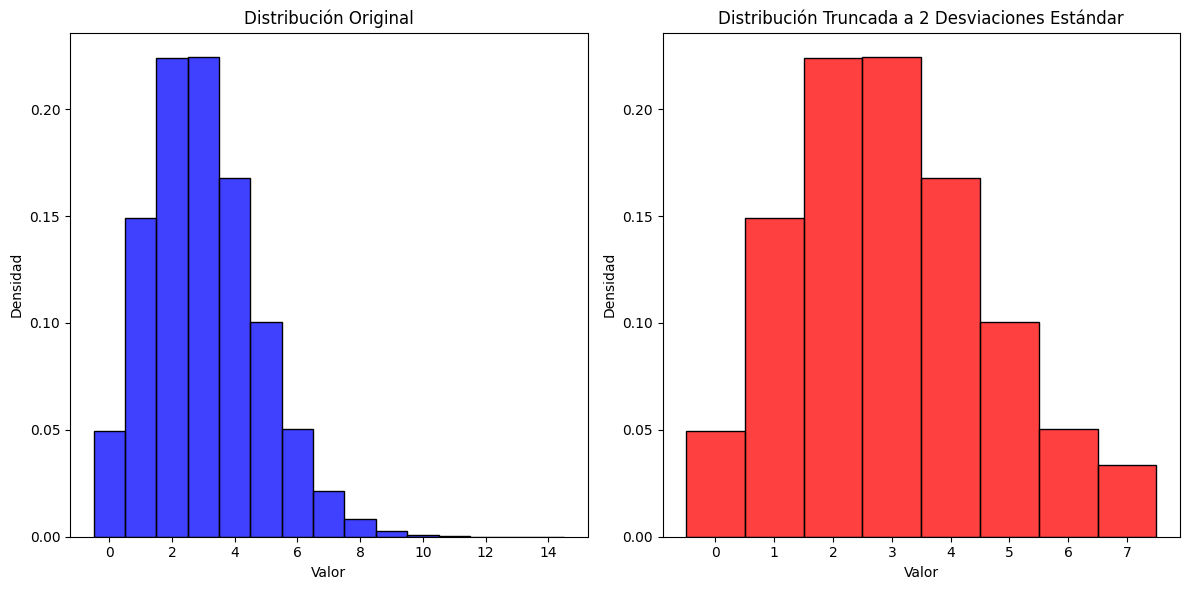

In [8]:
# Función de truncamiento por desviaciones estándar
def truncate_by_std(dist, mu, sigma, k):
    Inferior_limit = int(np.floor(mu - k * sigma))# Redondear hacia abajo para que sea un valor discreto
    Superior_limit = int(np.ceil(mu + k * sigma))# Redondear hacia arriba para que sea un valor discreto
    
    truncated_dist = np.clip(dist, Inferior_limit, Superior_limit)
    return truncated_dist

# Genera una muestra de datos con una distribución Poisson (se puede cambiar por otra distribución)
np.random.seed(42)
lambda_poisson = 3  # Parámetro de la distribución Poisson
sample_size = 1000000
datos_poisson = np.random.poisson(lambda_poisson, sample_size)

# Calculamos la media y desviación estándar de la distribución discreta
mu_discreta = np.mean(datos_poisson)
sigma_discreta = np.std(datos_poisson)

# Definimos el número de desviaciones estándar para el truncamiento
kValor = 2  # Truncar a 2 desviaciones estándar

# Aplicamos el truncamiento
datos_truncados = truncate_by_std(datos_poisson, mu_discreta, sigma_discreta, kValor)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos_poisson, kde=False, color="blue", stat="density", bins=np.arange(min(datos_poisson), max(datos_poisson) + 1, 1), discrete=True)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=False, color="red", stat="density", bins=np.arange(min(datos_truncados), max(datos_truncados) + 1, 1), discrete=True)
plt.title(f"Distribución Truncada a {kValor} Desviaciones Estándar")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

### Truncamiento por percentiles

El truncamiento por percentiles conciste en eliminar un porcentaje tanto inferior como superior de los datos, para ello primero se calculan los percentiles correspondientes a los limites y se toman como los limites para truncar la distribución, por ejemplo si se habla de truncar por el 5% se calcularia el percentil 5 y el 95 y estos dos serian el limite inferior y superior.  
$ Intervalo = [P_α , P_(100-α) ] $   
Se aplica mucho en los analisis de robustez, ya que este elimina outliers mejorando la estabilidad de las estimaciones, además de tambien ser utilizado en analisis de riesgos financieros y en estimación de truncamiento en analisis multivariente.  


##### -Distribución Continua

Utilizaremos la función clip de numpy, y calcularemos los percentiles que nos daran los limites con la funcion percentile tambien de numpy.

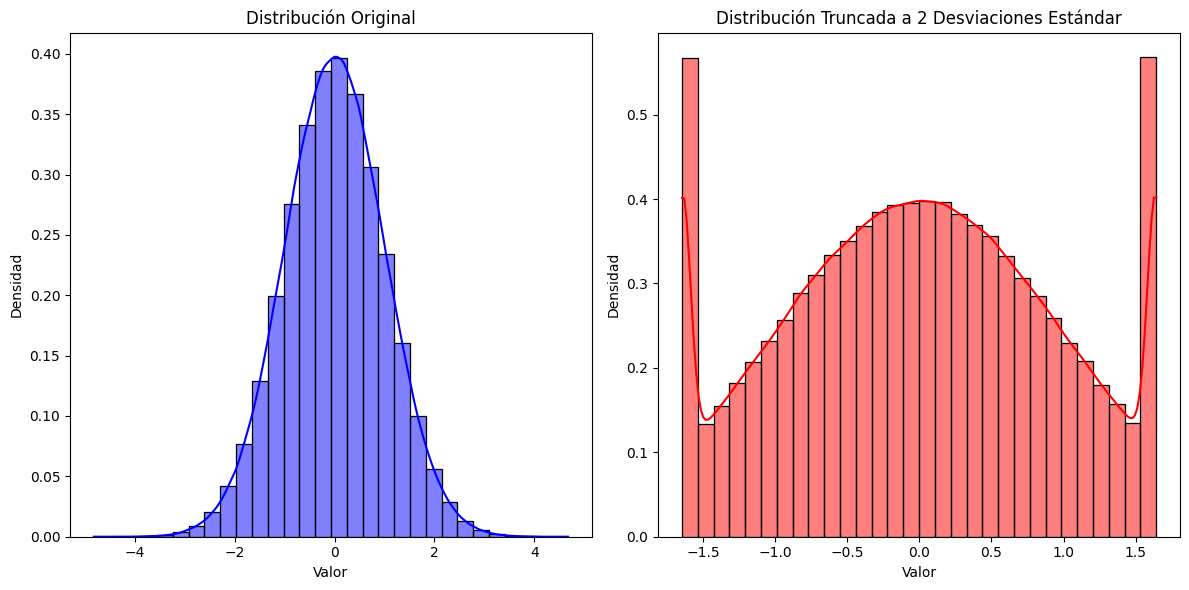

In [10]:
# Función de truncamiento por percentiles
def truncate_by_perc(dist, percentil_Inferior, percentil_Superior):
    Inferior_limit = np.percentile(dist, percentil_Inferior)
    Superior_limit = np.percentile(dist, percentil_Superior)
    
    truncated_dist = np.clip(dist, Inferior_limit, Superior_limit)
    return truncated_dist

# Genera una muestra de datos con una distribución normal (se puede cambiar por otra distribución)
np.random.seed(42)
mu, sigma = 0, 1  # Media y desviación estándar
sample_size = 1000000
datos = np.random.normal(mu, sigma, sample_size)

# Definimos los percentiles para el truncamiento
percentil_inferior = 5
percentil_superior = 95

# Aplicamos el truncamiento
datos_truncados = truncate_by_perc(datos, percentil_inferior, percentil_superior)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos, kde=True, color="blue", stat="density", bins=30)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=True, color="red", stat="density", bins=30)
plt.title(f"Distribución Truncada a {kValor} Desviaciones Estándar")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

##### -Distribución discreta

Utilizaremos la función clip de numpy, y calcularemos los percentiles que nos daran los limites con la funcion percentile tambien de numpy.

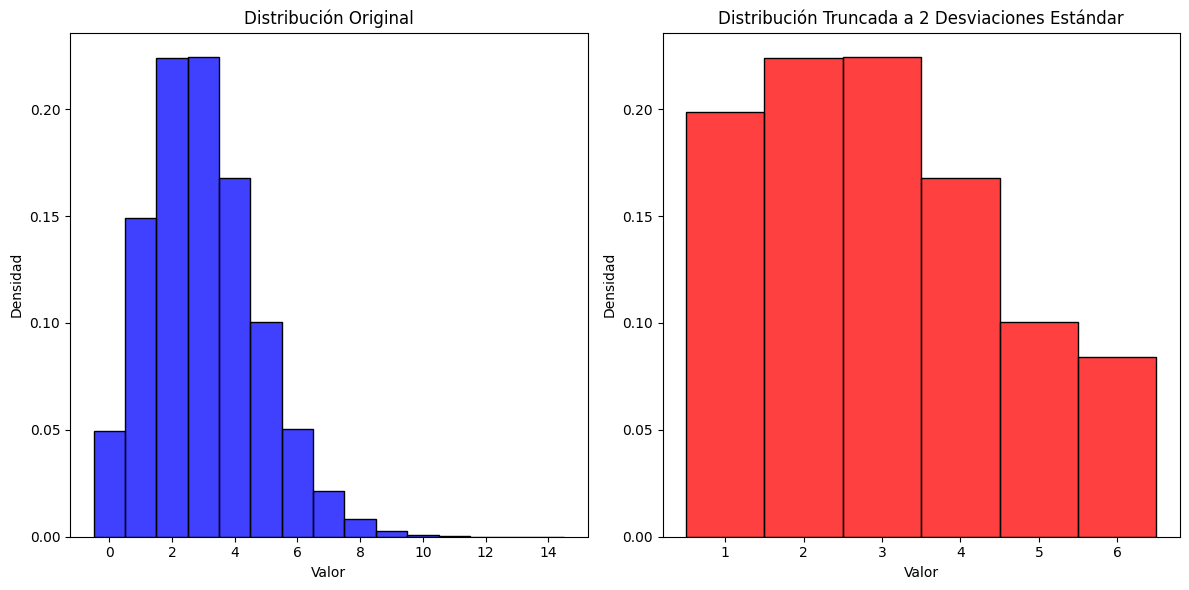

In [11]:
# Función de truncamiento por percentiles
def truncate_by_perc(dist, percentil_Inferior, percentil_Superior):
    Inferior_limit = np.percentile(dist, percentil_Inferior)
    Superior_limit = np.percentile(dist, percentil_Superior)
    
    truncated_dist = np.clip(dist, Inferior_limit, Superior_limit)
    return truncated_dist

# Genera una muestra de datos con una distribución Poisson (se puede cambiar por otra distribución)
np.random.seed(42)
lambda_poisson = 3  # Parámetro de la distribución Poisson
sample_size = 1000000
datos_poisson = np.random.poisson(lambda_poisson, sample_size)

# Definimos los percentiles para el truncamiento
percentil_inferior = 5
percentil_superior = 95

# Aplicamos el truncamiento
datos_truncados = truncate_by_perc(datos_poisson, percentil_inferior, percentil_superior)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(12, 6))

# Histograma de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos_poisson, kde=False, color="blue", stat="density", bins=np.arange(min(datos_poisson), max(datos_poisson) + 1, 1), discrete=True)
plt.title("Distribución Original")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Histograma de la distribución truncada
plt.subplot(1, 2, 2)
sns.histplot(datos_truncados, kde=False, color="red", stat="density", bins=np.arange(min(datos_truncados), max(datos_truncados) + 1, 1), discrete=True)
plt.title(f"Distribución Truncada a {kValor} Desviaciones Estándar")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar las gráficas
plt.tight_layout()
plt.show()